In [2]:
import diffusers
from diffusers import AutoencoderKL, DDPMScheduler, DiffusionPipeline, StableDiffusionPipeline, UNet2DConditionModel
import torch

pipeline = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True).to("cuda")
pipeline.load_lora_weights("F:\\MLOps\\MLOps_SD\\output", weight_name="pytorch_lora_weights.safetensors")
image = pipeline("Professional portrait for a CV. The person should appear in business outfit, with a white background suitable for professional settings.").images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

c:\Users\janbu\anaconda3\envs\mlops\Lib\site-packages\diffusers\models\attention_processor.py:1476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  hidden_states = F.scaled_dot_product_attention(


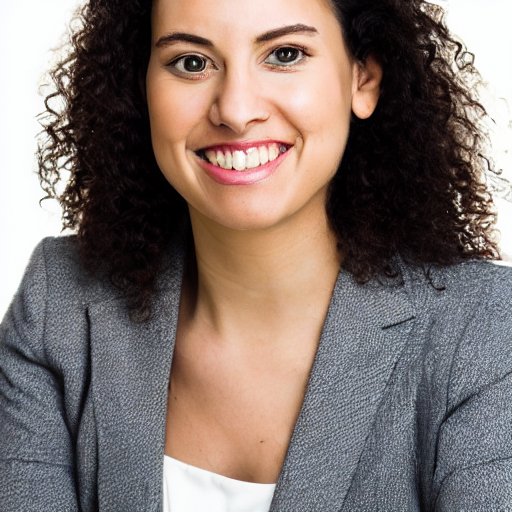

In [3]:
display(image)

In [10]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

pipeline = AutoPipelineForImage2Image.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True).to("cuda")
pipeline.load_lora_weights("F:\\MLOps\\MLOps_SD\\output", weight_name="pytorch_lora_weights.safetensors")

# prepare image
url = "https://i.ibb.co/qgF2MLx/jake-nackos-IF9-TK5-Uy-KI-unsplash-512.jpg"
init_image = load_image(url)

prompt = "Professional portrait for a CV. Blonde woman should appear in business outfit, with a white background suitable for professional settings. complete upper body. detailed, 8k"



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

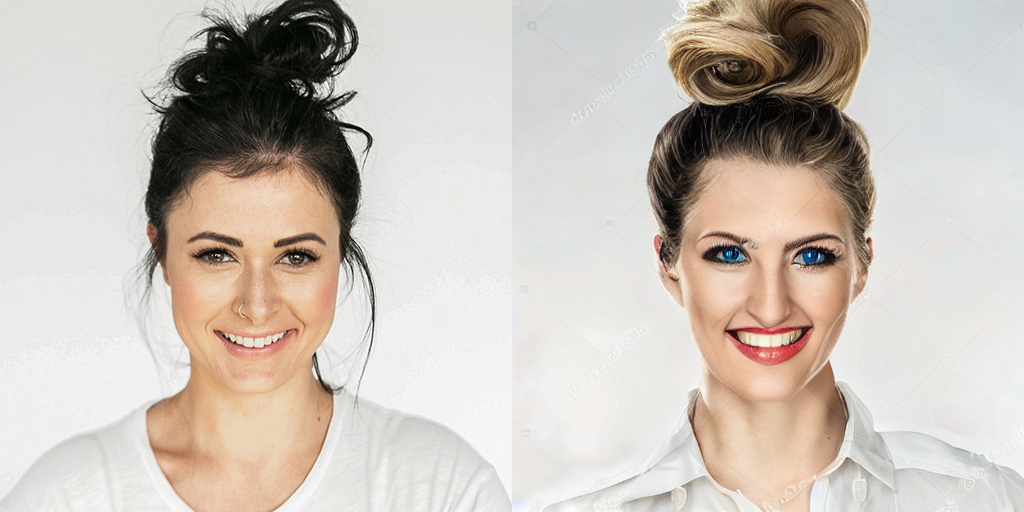

In [11]:
# pass prompt and image to pipeline
image = pipeline(prompt, image = init_image, strength = 0.75, guidance_scale = 7).images[0]
make_image_grid([init_image, image], rows=1, cols=2)